## import libraries

In [1]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Dense, Flatten
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(37)
tf.random.set_seed(89)



## Read the Train and Training labels

In [3]:
 
X=[];
for i in range (1,2401):
    img=np.array(Image.open('Train/'+str(i)+'.jpg'))
        # img=np.reshape(img,784)
        # img=img.astype(float)
    img = img.reshape(-1)
    X.append(img)
T=np.loadtxt(r"Train\Training Labels.txt", dtype=int)
T

array([0, 0, 0, ..., 9, 9, 9])

## Read the Test and Testing labels

In [4]:
X_test=[]; 
for i in range (1,201):
    img=np.array(Image.open('Test/'+str(i)+'.jpg'))
    # img=np.reshape(img,784)
    # img=img.astype(float)
    img = img.reshape(-1)
    X_test.append(img)
y_test=np.loadtxt(r"Test\Test Labels.txt", dtype=int)


# Standard the data 

In [5]:
train = tf.constant(X, dtype=tf.float16)
standard = preprocessing.scale(train)
stand = tf.convert_to_tensor(standard)

Y_T=  tf.keras.utils.to_categorical(T, 10)
Y_train  = tf.convert_to_tensor(Y_T)

In [6]:

test = tf.constant(X_test, dtype=tf.float16)
standard_test = preprocessing.scale(test)
stand_test = tf.convert_to_tensor(standard_test)

Y = tf.keras.utils.to_categorical(y_test, 10)
Y_test = tf.convert_to_tensor(Y)



## start modeling the neural network and get acc and show confusion matrix

point 1 

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand, Y_train, epochs=100)


Epoch 1/100
75/75 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.7742
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9471
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9737
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9858
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9883
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9900
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9904
Epoch 8/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.9917
Epoch 9/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9921
Epoch 10/100
75/75 [==============================] - 0s 2ms/step - loss: 9.8236e-04 - accuracy: 0.9921
Epoch

In [9]:
loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])

# acc=accuracy_score(Y_test, predict_values)
acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        acc+=1
        


print ("Accuracy: = " , (acc/len(test)) * 100)


7/7 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9150
loss 0.016991715878248215
accuracy: 0.9150000214576721
7/7 [==============================] - 0s 2ms/step
Accuracy: =  91.5


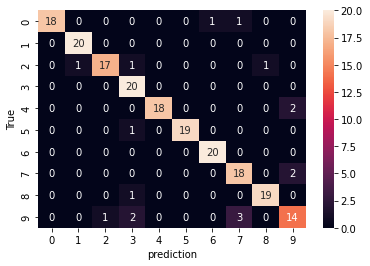

In [10]:
# cm= confusion_matrix(Y_test, predict_values)

# labels = ["0" , "1" , "2","3","4","5","6","7","8","9"]
# plot_confusion_matrix(cm,labels ,"Confusion.jpg")

confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-0.jpg")

point 2

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand, Y_train, epochs=200)

Epoch 1/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.7821
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9483
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9742
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9833
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9871
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.9892
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9904
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.9921
Epoch 9/200
75/75 [==============================] - 0s 3ms/step - loss: 9.8869e-04 - accuracy: 0.9933
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 8.6026e-04 - accuracy: 0.9933
E

In [12]:
loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])
Acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        Acc+=1


print ("Accuracy := ",Acc/len(test) *100)





7/7 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9200
loss 0.017772523686289787
accuracy: 0.9200000166893005
7/7 [==============================] - 0s 2ms/step
Accuracy :=  92.0


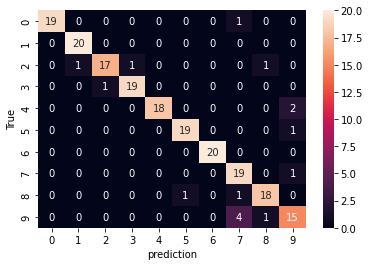

In [13]:

confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-1.jpg")

# Example not standard data 

Point 3 

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(train,Y_train, epochs=200)

Epoch 1/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.1054
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 4/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 6/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 9/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.1000
Epoch 11/

In [15]:
loss,acc=model.evaluate(test, Y_test)
print("loss", loss)
print("accuracy:" , acc)


predict_values = model.predict([test])
Accuracy =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        Accuracy+=1


print (Accuracy/len(test) *100)



7/7 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.1000
loss 0.10000000149011612
accuracy: 0.10000000149011612
7/7 [==============================] - 0s 2ms/step
10.0


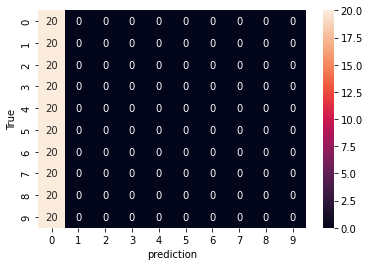

In [16]:

confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-2.jpg")

Point 4 

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand, Y_train, epochs=200)

Epoch 1/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.6546
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.7237
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.7400
Epoch 4/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.7563
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.6988
Epoch 6/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.6933
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.6596
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.6458
Epoch 9/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.6458
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.6779
Epoch 11/

In [18]:
loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])

# acc=accuracy_score(Y_test, predict_values)
acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        acc+=1
        


print ("Accuracy: = " , (acc/len(test)) * 100)


7/7 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.4950
loss 0.07100000232458115
accuracy: 0.4950000047683716
7/7 [==============================] - 0s 2ms/step
Accuracy: =  49.5


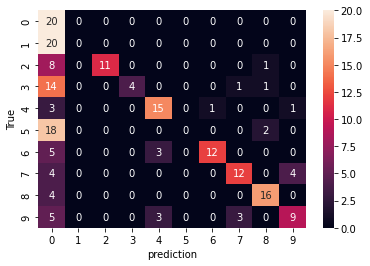

In [19]:

confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-3.jpg")

point 5

In [39]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand, Y_train, epochs=200)


Epoch 1/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.7183
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9333
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9625
Epoch 4/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9804
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9867
Epoch 6/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9887
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9904
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.9917
Epoch 9/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9921
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9925
Epoch 11/

In [40]:

loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])

# acc=accuracy_score(Y_test, predict_values)
acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        acc+=1
        


print ("Accuracy: = " , (acc/len(test)) * 100)


7/7 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9100
loss 0.017497476190328598
accuracy: 0.9100000262260437
7/7 [==============================] - 0s 2ms/step
Accuracy: =  91.0


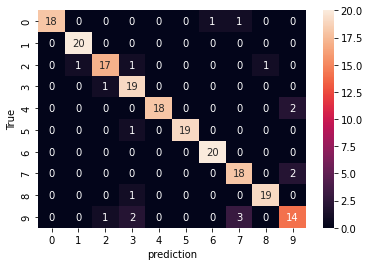

In [41]:

confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-4.jpg")

point 6

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand, Y_train, epochs=200)

Epoch 1/200
75/75 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.7321
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9375
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9742
Epoch 4/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9862
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9883
Epoch 6/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9904
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.9917
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.9917
Epoch 9/200
75/75 [==============================] - 0s 3ms/step - loss: 9.1076e-04 - accuracy: 0.9921
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 8.6852e-04 - accuracy: 0.9925
E

In [24]:

loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])

# acc=accuracy_score(Y_test, predict_values)
acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        acc+=1
        


print ("Accuracy: = " , (acc/200) * 100)

7/7 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9100
loss 0.018851062282919884
accuracy: 0.9100000262260437
7/7 [==============================] - 0s 2ms/step
Accuracy: =  91.0


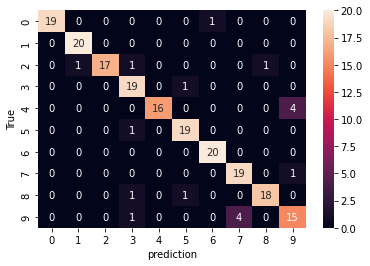

In [25]:

confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-5.jpg")

point 7

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand, Y_train, epochs=200)


Epoch 1/200
75/75 [==============================] - 1s 3ms/step - loss: 0.0537 - accuracy: 0.6654
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.8821
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9671
Epoch 4/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9862
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9896
Epoch 6/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9904
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.9917
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 9.3330e-04 - accuracy: 0.9925
Epoch 9/200
75/75 [==============================] - 0s 3ms/step - loss: 8.6612e-04 - accuracy: 0.9929
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 7.8909e-04 - accuracy: 0.99

In [27]:

loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])

# acc=accuracy_score(Y_test, predict_values)
acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        acc+=1
        


print ("Accuracy: = " , (acc/len(test)) * 100)

7/7 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.8850
loss 0.021832549944519997
accuracy: 0.8849999904632568
7/7 [==============================] - 0s 2ms/step
Accuracy: =  88.5


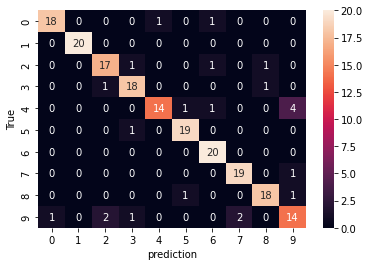

In [28]:

confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-6.jpg")

point 8

In [29]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand,Y_train, epochs=200)

Epoch 1/200
75/75 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.5537
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.8250
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.8704
Epoch 4/200
75/75 [==============================] - 0s 4ms/step - loss: 0.0135 - accuracy: 0.8833
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.8888
Epoch 6/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.8900
Epoch 7/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.8917
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.8925
Epoch 9/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.8933
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.8933
Epoch 11/

In [30]:

loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])

# acc=accuracy_score(Y_test, predict_values)
acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        acc+=1
        


print ("Accuracy: = " , (acc/len(test)) * 100)

7/7 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.8150
loss 0.028849786147475243
accuracy: 0.8149999976158142
7/7 [==============================] - 0s 2ms/step
Accuracy: =  81.5


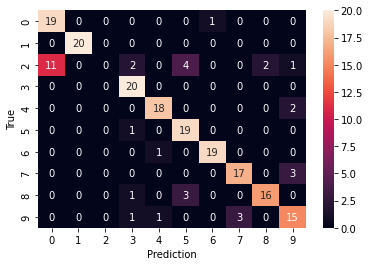

In [31]:

confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('Prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-7.jpg")

point 9

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand, Y_train, epochs=2,batch_size=1)

Epoch 1/2
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0440 - accuracy: 0.7254
Epoch 2/2
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0257 - accuracy: 0.8521


In [33]:

loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])

# acc=accuracy_score(Y_test, predict_values)
acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        acc+=1
        


print ("Accuracy: = " , (acc/len(test)) * 100)

7/7 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.8250
loss 0.03263747692108154
accuracy: 0.824999988079071
7/7 [==============================] - 0s 2ms/step
Accuracy: =  82.5


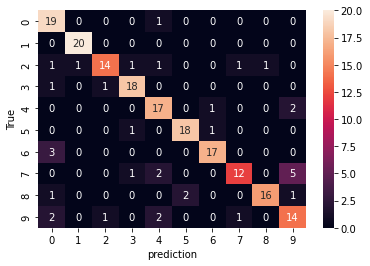

In [34]:
# ConfusionMat=confusion_matrix(Y_test, predict_values)

# labels = ["0" , "1" , "2","3","4","5","6","7","8","9"]
# plot_confusion_matrix(cm,labels ,"Confusion.jpg")


confusion_matrix = np.array([[0]*10]*10) 
for i, j in zip(y_test, predict_values):
    confusion_matrix[int(i)][np.argmax(j)] +=1

ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('prediction')
plt.ylabel('True')
fig = ax.get_figure()
fig.savefig("Confusion-8.jpg")

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(10,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(stand, Y_train, epochs=1,batch_size=1)

2400/2400 [==============================] - 6s 2ms/step - loss: 0.0438 - accuracy: 0.7225


In [36]:
loss,acc_T=model.evaluate(stand_test, Y_test)
print("loss", loss)
print("accuracy:" , acc_T)


predict_values = model.predict([stand_test])

# acc=accuracy_score(Y_test, predict_values)
acc =0
for i in range(len(predict_values)):
    if np.argmax(predict_values[i])==y_test[i]:
        acc+=1
        


print ("Accuracy: = " , (acc/200) * 100)

7/7 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.7650
loss 0.04089358448982239
accuracy: 0.7649999856948853
7/7 [==============================] - 0s 2ms/step
Accuracy: =  76.5
